# 뽑기를 기댓값만큼 시도해도 약 36.8%의 사람은 실패한다

> "작성 완료"

- toc: true
- branch: master
- badges: true
- comments: true
- hide: false
- author: 한재수
- categories: [Statistics]

## 상황 가정

`-` 어떤 아이템 상자가 있는데 내가 원하는 아이템 A는 $10\%$ 확률로 등장한다고 해보자

`-` 아이템 A를 뽑을 때까지 시도한 횟수는 기하 분포를 따른다

`-` 뽑을 확률이 $0.1$이니까 10번 하면 뽑겠지(?)라고 생각할 수 있지만 현실은 그렇지 않다 

- 기댓값은 10번이 맞는데...

In [2]:
def f(p):
    return 1 - (1 - p)**(1 / p)

In [103]:
f(p=0.1)

0.6513215599

`-` $P(\text{10번 안에 뽑음}) = 1 - P(\text{10번 모두 실패})$

`-` 이 값은 약 $0.65$이다

`-` 즉, 아이템 뽑기를 시도한 $35\%$의 사람들은 기댓값안에 원하는 아이템 A를 뽑지 못한다

`-` 애초에 모두가 기댓값안에 아이템을 뽑으면 기댓값이 그렇게 형성될 수가 없다...

## 확률에 따른 변화

- 확률이 더 낮아진다면?

`-` 더 희귀한 아이템 B가 있는데 B를 뽑을 확률은 $1\%$라고 한다

`-` 100번 안에 아이템 B를 뽑을 확률은 몇 일까?

In [104]:
f(p=0.01)

0.6339676587267709

`-` $10\%$일 땐 약 $65\%$였는데 $1\%$가 되니 약 $63.4\%$가 됐다

`-` $63.4\%$라고 하니 생각보다 할 만한 것 같다(?)

`-` 아이템 뽑기 확률이 더 낮아지면 어떻게 될까?

`-` 이번엔 더 희귀한 아이템 C를 고려하자

`-` C는 정말 희귀해서 $0.1\%$의 확률로 등장한다

`-` 1000번 시도해서 C를 뽑을 확률, 그러니까 적어도 한 개 뽑을 확률은 얼마일까?

In [105]:
f(p=0.001)

0.6323045752290363

`-` ?? 확률이 $1\%$일 때랑 차이가 거의 나지 않는다

`-` 생각해보면 확률이 낮아져도 시도 횟수는 올라가니까 엄청난 차이가 생길 것 같지는 않다

`-` 그럼 확률을 더욱 낮게 해보자

`-` 그래프로 비교할 수 있으면 더 좋을 것 같다

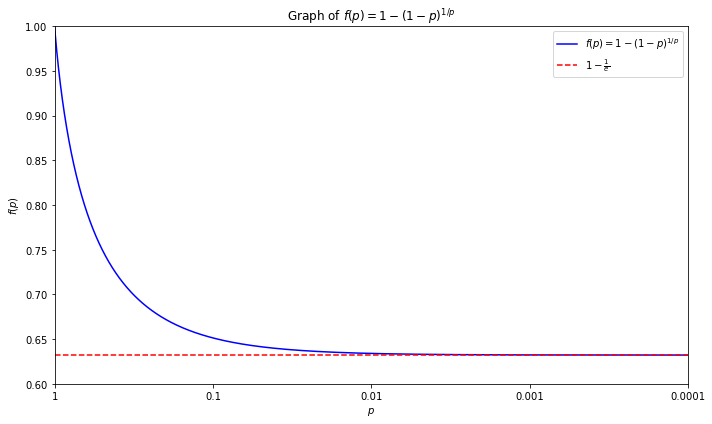

In [7]:
#collapse
import matplotlib.pyplot as plt
import numpy as np

p = np.arange(1e-4, 1, 1e-4)
fp = f(p)
convergence_value = 1 - 1 / np.e

plt.figure(figsize=(10, 6))
plt.plot(p, fp, color="blue", linestyle="-", label="$f(p) = 1 - (1 - p)^{1 / p}$")
plt.axhline(y=convergence_value, color="r", linestyle="--", label="$1 - \\frac{1}{e}$")
plt.xlabel("$p$")
plt.ylabel("$f(p)$")
plt.ylim(0.6, 1)
plt.title("Graph of $f(p) = 1 - (1 - p)^{1 / p}$")
plt.xlim(0.0001, 1)
plt.xscale("log")
plt.gca().invert_xaxis()
plt.xticks([1, 0.1, 0.01, 0.001, 0.0001], ["1", "0.1", "0.01", "0.001", "0.0001"])
plt.minorticks_off()
plt.tight_layout()
plt.legend()
plt.show()

## 진실

`-` 위의 그래프를 보면 $f(p)$가 어느 한 점으로 수렴하는 것 같다

`-` 우리가 고려하고 있는 상황을 복기해보자

`-` 당첨 확률이 $p$인 뽑기를 $n = \frac{1}{p}$번 하는 것을 고려하자

`-` 이때 당첨 확률이 $p$인 뽑기를 $n$번 시도해서 1개도 못 뽑을 확률을 $P(A)$라 하고 이를 계산하자

`-` $P(A)=(1-p)^{\frac{1}{p}}$이다

`-` 그런데 어디서 본 것 같은 모양이다?

`-` 자연로그의 밑 $e=\lim\limits_{n \to \infty}\left(1+\frac{1}{n}\right)^n$

`-` $\lim\limits_{p\to 0+}(1-p)^{\frac{1}{p}} = \lim\limits_{n\to \infty}\left(1-\frac{1}{n}\right)^{n},\quad n \to \infty\; \text{as}\; p\to {0+}$

`-` $ \lim\limits_{n\to \infty}\left(1-\frac{1}{n}\right)^{n} =  \lim\limits_{n\to \infty}\left(\frac{n-1}{n}\right)^{n}$

`-` $n = t+1$로 치환하면 $\lim\limits_{t\to \infty}\left(\frac{t}{t+1}\right)^{t+1} = \lim\limits_{t\to \infty}\left(\frac{t+1}{t}\right)^{-(t+1)} = \lim\limits_{t\to \infty}\left(1+\frac{1}{t}\right)^{-t}\left(1+\frac{1}{t}\right)^{-1}$

`-` 극한의 성질에 의해 $\lim\limits_{t\to \infty}\left(1+\frac{1}{t}\right)^{-t}=\left(\lim\limits_{t\to \infty}\left(1+\frac{1}{t}\right)^t\right)^{-1}=e^{-1},\quad \lim\limits_{t\to \infty}\left(1+\frac{1}{t}\right)^{-1} = 1$

`-` 따라서 극한의 성질에 의해

`-` $\lim\limits_{t\to \infty}\left(1+\frac{1}{t}\right)^{-t}\left(1+\frac{1}{t}\right)^{-1}=\lim\limits_{t\to \infty}\left(1+\frac{1}{t}\right)^{-t} \times\lim\limits_{t\to \infty}\left(1+\frac{1}{t}\right)^{-1}=\frac{1}{e}$

`-` 즉, $p$가 적당히 작으면 $P(A)$를 $\frac{1}{e}$에 근사할 수 있다

## 활용

`-` 어떤 사람이 당첨 확률이 $p=0.1$인 아이템을 35번 사용했는데도 당첨 안됐다고 해보자

`-` $p=0.1$이므로 당첨되기 위해 시도하는 횟수의 기댓값은 $10$이다

`-` 기댓값만큼 시도해서 안될 확률은 약 $0.368$였다

`-` 아이템을 사용하는 것은 독립시행이므로 35번 시도해서 안될 확률은 $0.368^{\frac{35}{10}}\approx 0.03$이다

`-` 추가로 내가 다른 사람들보다 운이 얼마나 없는지도 평가할 수 있다

`-` 당첨되기까지의 시도 횟수를 오름차순 정렬해보자

`-` 35번 쓰고도 당첨 안된 사람은 하위 $3\%$안에 든다

`-` 물론 아직 당첨된 게 아니므로 운이 더 나빠질 가능성이 남아있다

`-` 참고로 이러한 접근 방법은 `당첨 될 때까지 시도`하는 모든 것에 가능하다

`-` 즉, 확률 변수가 2개의 결과 (ex: $0$ or $1$, 당첨 or 실패)를 가지며 원하는 결과가 나올 때까지 시도하는 것에 바로 적용 가능하다

`-` 이러한 확률 변수는 [기하 분포](https://jaesu26.github.io/study-blog/statistics/2021/06/30/%ED%99%95%EB%A5%A0%EB%B6%84%ED%8F%AC.html#%EA%B8%B0%ED%95%98-%EB%B6%84%ED%8F%AC)를 따른다

## 부록

### $\lim\limits_{x\to a}f(x) = f\left(\lim\limits_{x\to a}x\right)$

`-` 함수 $f$가 $x=a$에서 연속이면 아래가 성립한다

`-` $\lim\limits_{x\to a}f(x)=f\left(\lim\limits_{x\to a}x\right)$

`-` 연속 함수의 정의에 따라 $\lim\limits_{x\to a}f(x)=f(a)$

`-` $y=x$는 당연히 연속 함수이므로 $\lim\limits_{x\to a}x=a$

`-` 따라서 $f(a)$에 $a$ 대신 $\lim\limits_{x\to a}x$를 대입할 수 있다

`-` 즉, $\lim\limits_{x\to a}f(x)=f(a)=f\left(\lim\limits_{x\to a}x\right)$

`-` 참고로 $x\to a$는 $x$가 발산하는 경우($x\to\infty$ or $x\to-\infty$)를 포함하는 게 아니다

### $\lim\limits_{x\to a}\{f(x)g(x)\} = \left\{\lim\limits_{x\to a}f(x)\right\}\left\{\lim\limits_{x\to a}g(x)\right\}$

`-` $\lim\limits_{x\to a}f(x) = \alpha, \, \lim\limits_{x\to a}g(x) = \beta$라고 하자

`-` 그러면 $\lim\limits_{x\to a}\{f(x)g(x)\} = \left\{\lim\limits_{x\to a}f(x)\right\}\left\{\lim\limits_{x\to a}g(x)\right\}$이 성립한다

`-` 단, 함수 $f(x)g(x),\, f(x),\, g(x)$가 $x=a$에서 극한값을 가져야 성립한다

`-` 참고로 $\alpha,\beta$는 실수이다

`-` 만약 이를 어기면 $\lim\limits_{x\to 0+}x=0,\lim\limits_{x\to0+}\frac{1}{x}=\infty$이므로

`-` $\lim\limits_{x\to 0+}\frac{x}{x} =1,\, \left\{\lim\limits_{x\to 0+}x\right\}\left\{\lim\limits_{x\to0+}\frac{1}{x}\right\}=0\cdot\infty$

`-` 하지만 $1\neq 0 \cdot \infty$이고 애초에 $\infty$은 수가 아니므로 곱셈과 같은 연산을 할 수 없다